In [1]:
import torch 
import torch.nn as nn
import torch.nn.functional as f

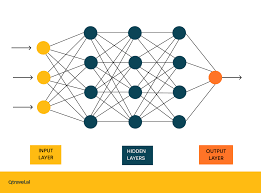

In [3]:
from IPython.display import Image, display

image = "neural_net.jpg"
display(Image(filename= image))

In [4]:
#Create a module class that inherits nn.module
class Model(nn.Module):
    # Input layer (4 feautures of the flower) --> Hidden layer1 (number of neurons)
    # H2 (n) -->
    # Output (3 classes of iris flowers)
    # nn.linear means: Linear neural network
    # fc1: means fully connected 1
    # it enters through the input layer, then to hidden layer 1 and continous like that
    # self.super()__init__() is to ensure we are referring to the parent class, instantiating out nn.Module
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        
        return x

In [5]:
# Pick a manual seed for randomization
torch.manual_seed(41)
model = Model()

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [7]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [8]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [9]:
# Changing the name of the species to numbers(0, 1, 2)
# Change last column to floats

my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [10]:
# Train Test and Split: Set X, Y
x = my_df.drop